## Introduccion a Tensor Flow

In [30]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [31]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [32]:
res = tf.multiply(x1,x2)
print(res)

tf.Tensor([ 6 14 24 36 50], shape=(5,), dtype=int32)


### Aprendizaje neuronal de las señales de trafico

In [33]:
import os
import skimage.io


In [34]:
def ml_load_data(data_directory):
    dirs= [d for d in os.listdir(data_directory)
          if os.path.isdir(os.path.join(data_directory,d))]
    labels= []
    images=[]
    for d in dirs:
        label_dir= os.path.join(data_directory,d)
        files_names= [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir)
                      if f.endswith(".ppm")]
    
    
        for f in files_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
            
    return images, labels
        

In [35]:
#main_dir= r"Hola\python-ml-course-master\datasets\belgian"
#train_data_dir= os.path.join(main_dir, "Training")
#test_data_dir= os.path.join(main_dir, "Testing" )

In [36]:
ml_load_data(r"Testing")

([array([[[ 26,  43,  54],
          [ 64,  81,  81],
          [ 60,  68,  57],
          ...,
          [115, 127, 117],
          [112, 125, 115],
          [110, 124, 112]],
  
         [[ 28,  39,  47],
          [ 49,  63,  62],
          [ 50,  62,  51],
          ...,
          [116, 131, 119],
          [109, 124, 113],
          [107, 123, 111]],
  
         [[ 30,  34,  41],
          [ 34,  45,  44],
          [ 41,  56,  45],
          ...,
          [114, 134, 121],
          [105, 124, 111],
          [104, 123, 110]],
  
         ...,
  
         [[ 64,  67,  56],
          [126, 115, 113],
          [199, 178, 184],
          ...,
          [115, 199, 206],
          [136, 224, 224],
          [159, 233, 231]],
  
         [[139, 150, 141],
          [157, 161, 160],
          [160, 159, 166],
          ...,
          [106, 186, 197],
          [130, 205, 212],
          [155, 221, 225]],
  
         [[157, 177, 171],
          [102, 123, 123],
          [ 30,  51,  59

In [40]:
images, labels = ml_load_data("Training")

In [41]:
len(images)

4575

In [28]:
import numpy as np

In [29]:
images= np.array(images)

NameError: name 'images' is not defined

In [12]:
labels= np.array(labels)

In [13]:
images.size

4575

In [14]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [15]:
len(set(labels))

62

In [16]:
import matplotlib.pyplot as plt

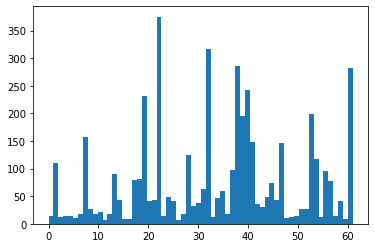

In [17]:
plt.hist(labels, len(set(labels)))
plt.show()

In [18]:
import random

In [19]:
rand_sign= random.sample(range(0, len(labels)),6)
rand_sign

[1393, 1631, 3036, 1891, 801, 797]

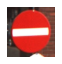

Forma: (110, 105, 3), min: 8, max:255


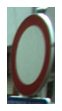

Forma: (146, 72, 3), min: 0, max:255


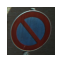

Forma: (240, 241, 3), min: 0, max:255


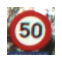

Forma: (63, 63, 3), min: 21, max:255


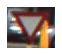

Forma: (41, 48, 3), min: 10, max:255


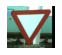

Forma: (256, 296, 3), min: 0, max:255


In [20]:
for i in range (len(rand_sign)): 
    plt.subplot(1, 6, i+1)
    temp_im=images[rand_sign[i]]
    plt.axis("off")
    plt.imshow(temp_im)
    plt.show()
    print("Forma: {0}, min: {1}, max:{2}". format(temp_im.shape,
                                                  temp_im.min(),
                                                  temp_im.max()))

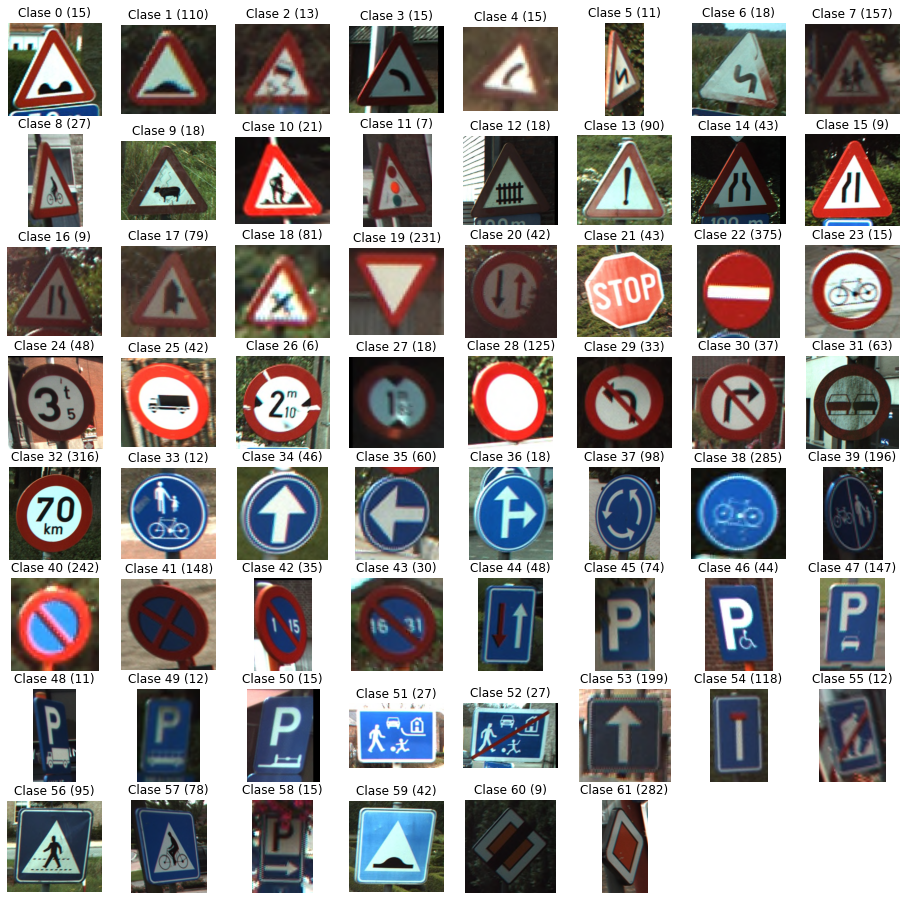

In [22]:
plt.figure(figsize=(16, 16))
unique_labels= set(labels)
i=1
for label in unique_labels:
    tem_im= images[list(labels).index(label)]
    plt.subplot(8, 8, i)
    plt.axis("off")
    plt.title( "Clase {0} ({1})" .format(label, list(labels).count(label)))
    i +=1  
    plt.imshow(tem_im)        
plt.show()

In [30]:
x= tf.compat.v1.placeholder(dtype=tf.compat.v1.float32, shape=[None, 30, 30])

RuntimeError: tf.placeholder() is not compatible with eager execution.